# BE3 DM 2024 : 
## Démonstration de quelques méthodes de clustering.
#### Les réponses aux exercices sont données à l asuite.

# Algorithmes de clustering - Non supervisé

Dans l'apprentissage automatique, les types d'apprentissage peuvent être classés en trois grandes catégories : 

1. L'apprentissage supervisé 
2. L'apprentissage non supervisé 
3. L'apprentissage semi-supervisé  

Les algorithmes de la famille non supervisé n'ont aucune variable  liée aux données à prédire. Les données n'ont qu'une entrée qui  constituée de  variables qui décrivent les données. C'est là qu'intervient le Clustering.

La mise en cluster consiste à regrouper un ensemble d'objets de telle sorte que les objets d'un même cluster soient proches davantage les uns les autres qu'avec les objets d'autres clusters. La similarité est une mesure qui reflète la qualité du clustering.       
Le clustering est principalement utilisé pour l'exploration de données. Elle est utilisée dans de nombreux domaines tels que   la reconnaissance de formes, l'analyse d'images, la recherche d'informations, la bio-informatique, la compression de données et l'infographie.

## K-Means 

Il existe de nombreux modèles de **clustering**. Nous allons passer en revue les plus populaires.      
Malgré sa simplicité,  **K-means** est largement utilisé en clustering dans de nombreuses applications, particulièrement utile si vous avez besoin de découvrir rapidement des aperçus à partir de données **non étiquetées** (sans classe).       
Dans la suite, nous montrons comment utiliser le k-Means pour la segmentation de la clientèle (une DB).

In [2]:


import numpy as np  
import pandas as pd  

# Le contenu du répertoire actuel (./)

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./telecom_churn.csv
./data_seq.csv
./data_no_dups.csv
./vlib.csv
./Mall_Customers.csv
./predict_ranking.csv.csv
./train.csv
./autos_acp.xls
./store.csv
./machine-learning-non-supervis-correction.ipynb
./sportdata.csv


# Exerrice 1:
- Importer numpy, pandas, matplotlib.pyplot, seaborn
- Importer le fichier Mall_customers.csv et le stocker dans df
- Afficher le nombre de lignes et de colonnes
- Afficher les statistiques des variables
- Afficher le typage des variables
- Afficher les 10 première lignes de df

In [3]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')

Les données : Mall_Customers.csv

In [5]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info(), df.describe(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(None,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000           78.000000               73.000000
 max    200.000000   70.000000          137.000000               99.000000,
 (200, 5))

# Exerrice 2:
- Renommer les variables "Annual Income (k$)" en 'Income' et 'Spending Score (1-100)' en 'Score'. Utiliser .rename() de pandas. 
- Afficher un "pairplot" selon le genre (male - female) 
- Que peut on dire sur la variable "Gender"?  Estelle pertinente pour notre segmentation?

In [30]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### A propos de  "pairplot" :

Dans les figures ci-dessous, chaque combinaison de variables est représentée par un nuage de points et les tracés diagonaux montrent la distribution de chaque variable individuelle.

Voir aussi (doc) :       
https://www-geeksforgeeks-org.translate.goog/data-visualization-with-pairplot-seaborn-and-pandas/?_x_tr_sl=en&_x_tr_tl=fr&_x_tr_hl=fr&_x_tr_pto=rq#:~:text=In%20Seaborn's%20Pairplot%2C%20the%20'diag_kind,and%20'scatter'%20for%20scatterplots.      
<br>

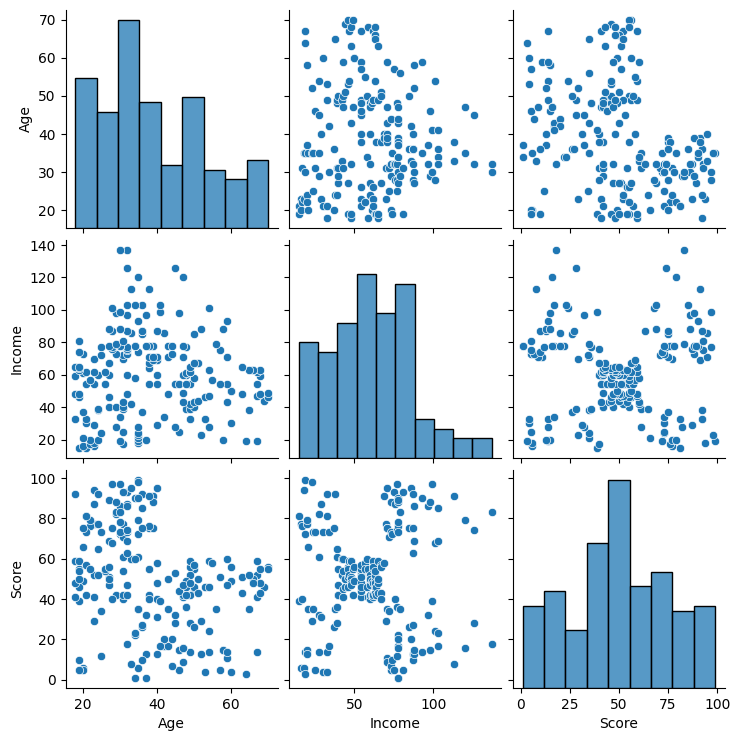

In [9]:
# Chaque combinaison de variables est représentée par un nuage de points et les graphiques diagonaux montrent la 
# distribution de chaque variable individuelle.

sns.pairplot(df.drop('CustomerID', axis=1))
plt.show()

# Donc : en digonal, on a la distribution des 3 variables "Age", "Income" et "Score". On peut remarquer que p. ex, la fig
# de la 1e ligne, 2e col (x=Income, y=Age) et la mm que pour la ligne 2, col 1 (x=Age, y=Income) tournée à 90 degrés à gche.

Si on ajoute "hue", alors cette var est maintenant distinguée dans chaque plot (Ici, male - female) et  chaque figure subit un `KDE` (Kernel Density Estimation).     
P.ex, si on prends la premier en haut à gauche, c'est la forme après KDE de la distribution de "Age" et en plus, pour chaque modalité male-female, on a un KDE.      
<font color="red"> KDE est  appliqué sur la diagonale seulement </font>
 

In [10]:
# Rappel de la BD utilisée.
df.drop('CustomerID', axis=1).head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [23]:
df.columns.size
list(df.columns)

['CustomerID', 'Gender', 'Age', 'Income', 'Score']

On calcule des corrélations entre les vars pour voir si "pairplot" les montrent ou pas .

In [27]:
# Corrélation entre les paires de vars (du mm type numéric)
df1=df.drop(["Gender","CustomerID"], axis=1)
for i in range(df1.columns.size-1) :
    for j in range(i+1,df1.columns.size) :
        if type(df1.columns[i]) == type(df1.columns[j]) : 
            print(f"entre {df1.columns[i]} et {df1.columns[j]} \t: {df1[df1.columns[i]].corr(df1[df1.columns[j]])}")
# On constate l'absence de corrélation

entre Age et Income 	: -0.012398042736060145
entre Age et Score 	: -0.32722684603909014
entre Income et Score 	: 0.009902848094037608


Pour voir des plots précis entre 2 vars (détecter p.ex. une corrélation ou pas)...

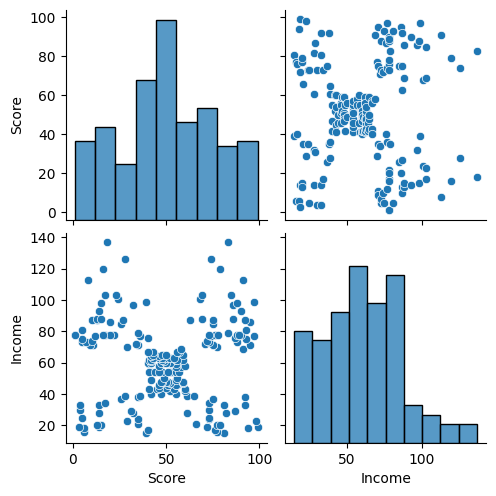

In [29]:

selected_vars = ['Score', 'Income'] # Score ! Spending Score (1-100)
sns.pairplot(df1, vars=selected_vars)
plt.show()
# On constate l'absence de "corrélation" (0.0099 ci-dessus) entre ces 2 vars sauf une zone compacte visible (lig1, col2)!

#### Rappel Exerrice 2 (suite):
- ~~Renommer les variables "Annual Income (k$)" en 'Income' et 'Spending Score (1-100)' en 'Score'.~~
- Afficher un pairplit selon le genre (Homme - Femme)
- Que peut on dire sur la variable gender? Semble t'elle pertinente pour notre segmentation?

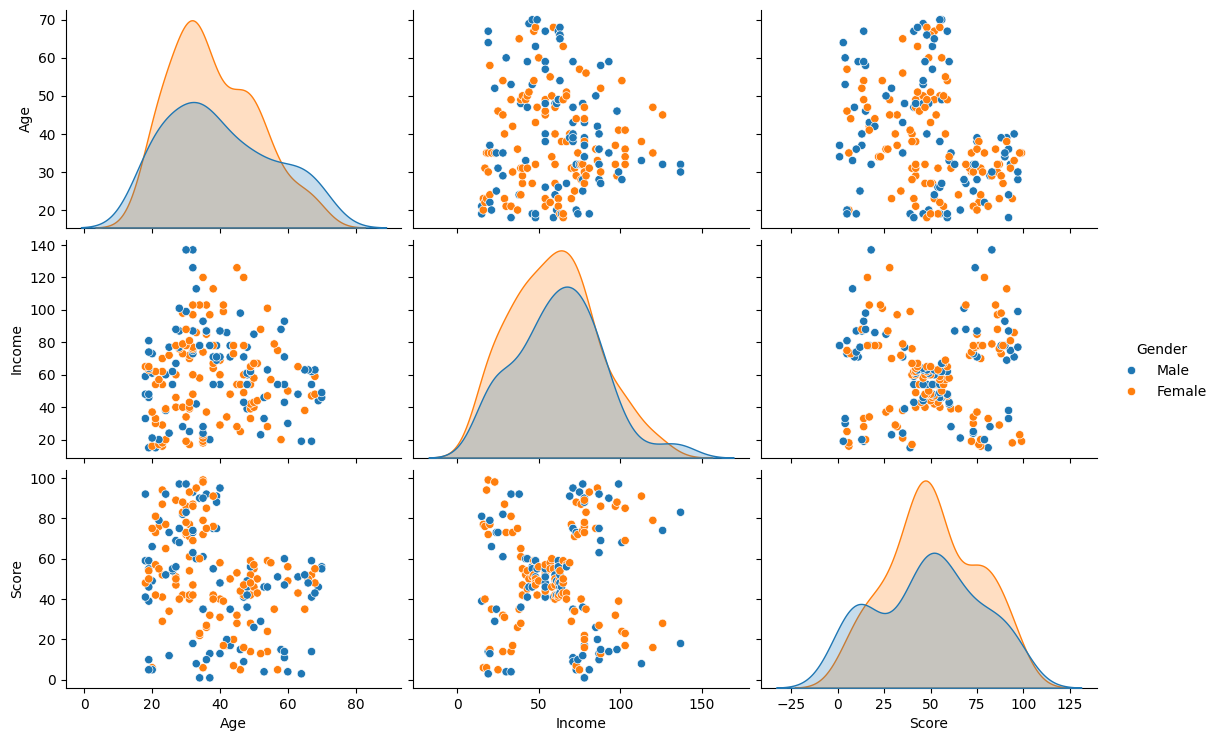

In [8]:
# Voyons les données visualisées par pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
# Alex : les paramètres 
# "hue" : name of variable in data to map plot aspects to different colors.
# Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE)
# "aspect" : height gives the width (in inches) of each facet.= un ratio entre les 2 axes 
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

### Réponse à la 3e partie de la Exerrice : 
Le graphique ci-dessus montre que le sexe ("Gender") n'a pas de rapport direct avec la segmentation de la clientèle. 

C'est pourquoi nous pouvons l'écarter et passer à d'autres variables de prédiction.    
Nous allons désormais utiliser le paramètre "X" pour représenter ces variables.

### Rappel : 
- Le param X = df sans 'CustomerID', 'Gender' :  X = df.drop(['CustomerID', 'Gender'], axis=1)
- Sur la diagonale, on remarque que "female" est distingué de "male" (Female dépense plus, gagne plus et est plus agée).
- A moins que les 2 couleurs "male" / "female" soient inversées ! C'est un détail !

# Exerrice 3:
Quelques exemples de clustering (réussi ou pas !)         
![](https://dendroid.sk/wp-content/uploads/2013/01/kmeansimg-scaled1000.jpg)



- Importer Kmeans de sklearn. 
- Nous voulons réaliser plusieurs Kmeans afin d'utiliser la règle du coude (méthode **ELBOW**) afin de définir le nombre de clusters optimal. 

<font color="red" size="4">Réaliser 10 kmeans (range 1..11).</font>

- Rappel : l'inertie = SSE appelé "inertia_" (la doc :)        
inertia_ : float   (SSE : erreur intra-cluster)   
Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

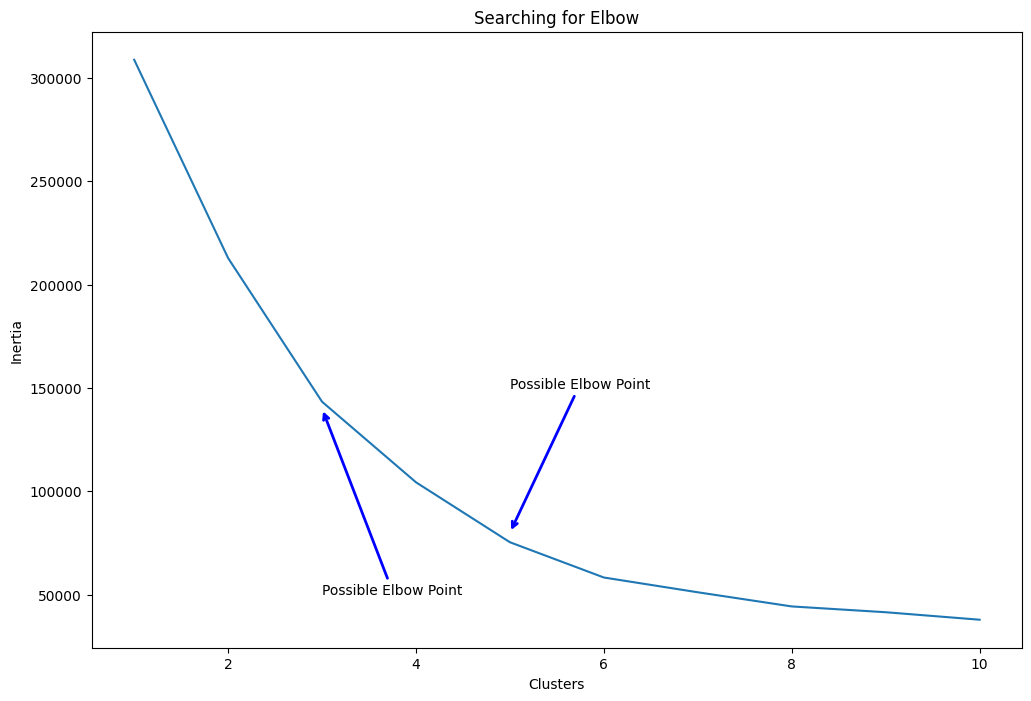

In [34]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

La méthode ELBOW permet  de sélectionner le cluster lorsqu'il y a un changement significatif de  SSE. Comme on peut le voir sur le graphique, cela peut être 3 ou 5. Voyons les deux résultats dans le graphique et décidons.

Principe : Une stratégie simple pour identifier le nombre de classes consiste à faire varier K et surveiller l’évolution de l’inertie intra-classes (W : _Within-cluster_, par opposition à B : _Between-cluster_ = distance entre clusters à maximiser). L’idée est de visualiser le "coude" où l’adjonction d’une classe ne correspond à rien dans la structuration des données.

Pour la suite nous choisirons K = 3.

# Exerrice 4:
- Instancier la méthode avec les paramètres n_clusters = 3
- Lancer un Kmeans avec K = 3
- Afficher le scatter plot croisant "Income" et "Score" avec pour label (hue) "Labels" (cette colonne aura été ajouté à X)

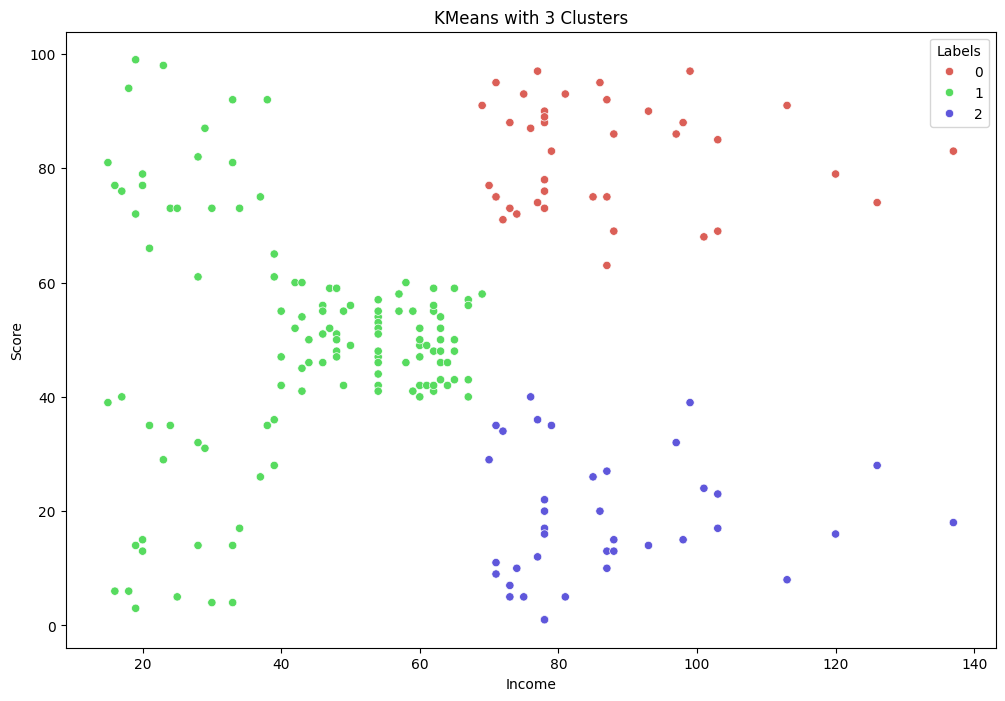

In [36]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
# ALEX : erreur de version : sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'],  palette=sns.color_palette('hls', 3))
# ALEX : exemple trouvé : sns.scatterplot(data=df,x="cgpa",y="resume_score",hue="placed")
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels',  palette=sns.color_palette('hls', 3))

plt.title('KMeans with 3 Clusters')
plt.show()

In [48]:
print(f" {km3.inertia_ =}, \n {km3.cluster_centers_ =}, \n {km3.labels_=}, \n {km3.n_iter_=},\n {km3.n_features_in_=}, \n {km3.feature_names_in_=}") 

 km3.inertia_ =143342.751571706, 
 km3.cluster_centers_ =array([[3.26923077e+01, 8.65384615e+01, 8.21282051e+01, 2.00000000e+00],
       [4.03252033e+01, 4.41544715e+01, 4.98292683e+01, 1.11022302e-15],
       [4.03947368e+01, 8.70000000e+01, 1.86315789e+01, 1.00000000e+00]]), 
 km3.labels_=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32), 
 km3.n_iter_=9,
 km3.n

# Exerrice 5:
- Instancier la méthode avec les paramètres n_clusters = 5
- Lancer un Kmeans avec K = 5
- Afficher le scatter plot croisant "Income" et "Score" avec pour label (hue) "Labels"
- Utiliser random_state = 42 afin d'avoir tout le temps les mêmes résultats

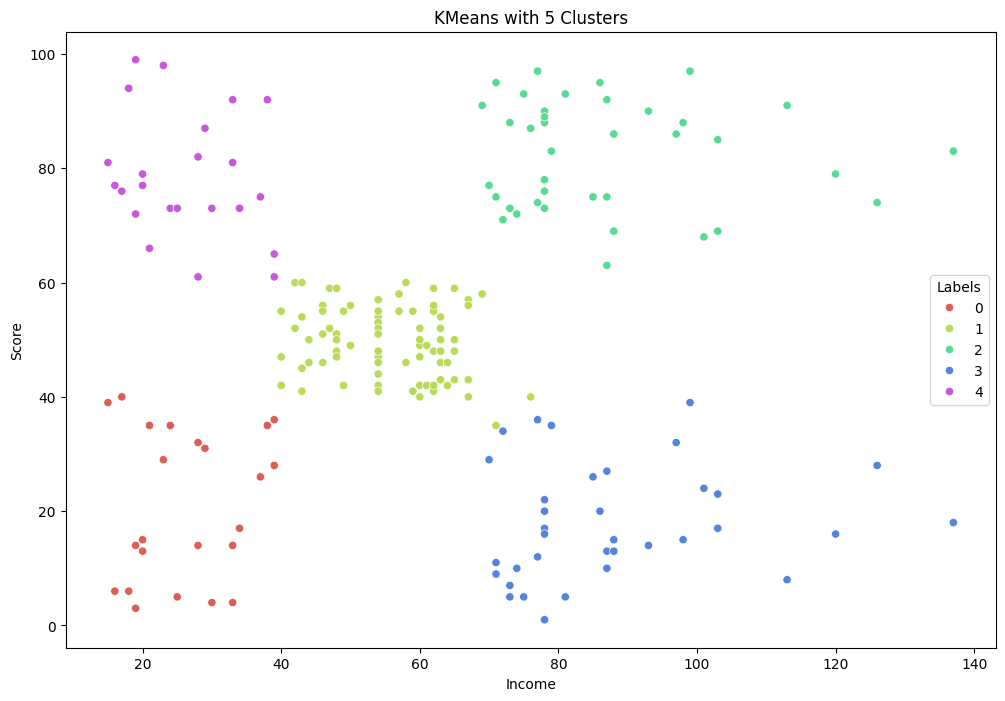

In [75]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=5, random_state = 42).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
# Alex : je corrige : sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'],  palette=sns.color_palette('hls', 5))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels',  palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

Selon les graphiques, on peut dire que 5 cluters semblent meilleures que 3. Même si on ne peut pas vraiment savoir avec certitude lequel est le meilleur,  en examinant les données, on peut dire que k=5 est un bon choix. 

# Exerrice 6:
Nous avons identifié des cluster mais il faut analyser les différences entre ces clusters afin de pouvoir donner un nom plus explicite que "Cluster N". Pour cela nous allons réaliser des graphiques. Il est possible de comparer nos populations avec des tests statistiques afin de juger de la significativité des différences entre clusters.

- Afficher le swarmplot entre "Labels" et "Income"
- Afficher le swarmplot entre "Labels" et "Score"
- Analyser les graphiques afin de trouver des noms à nos clusters

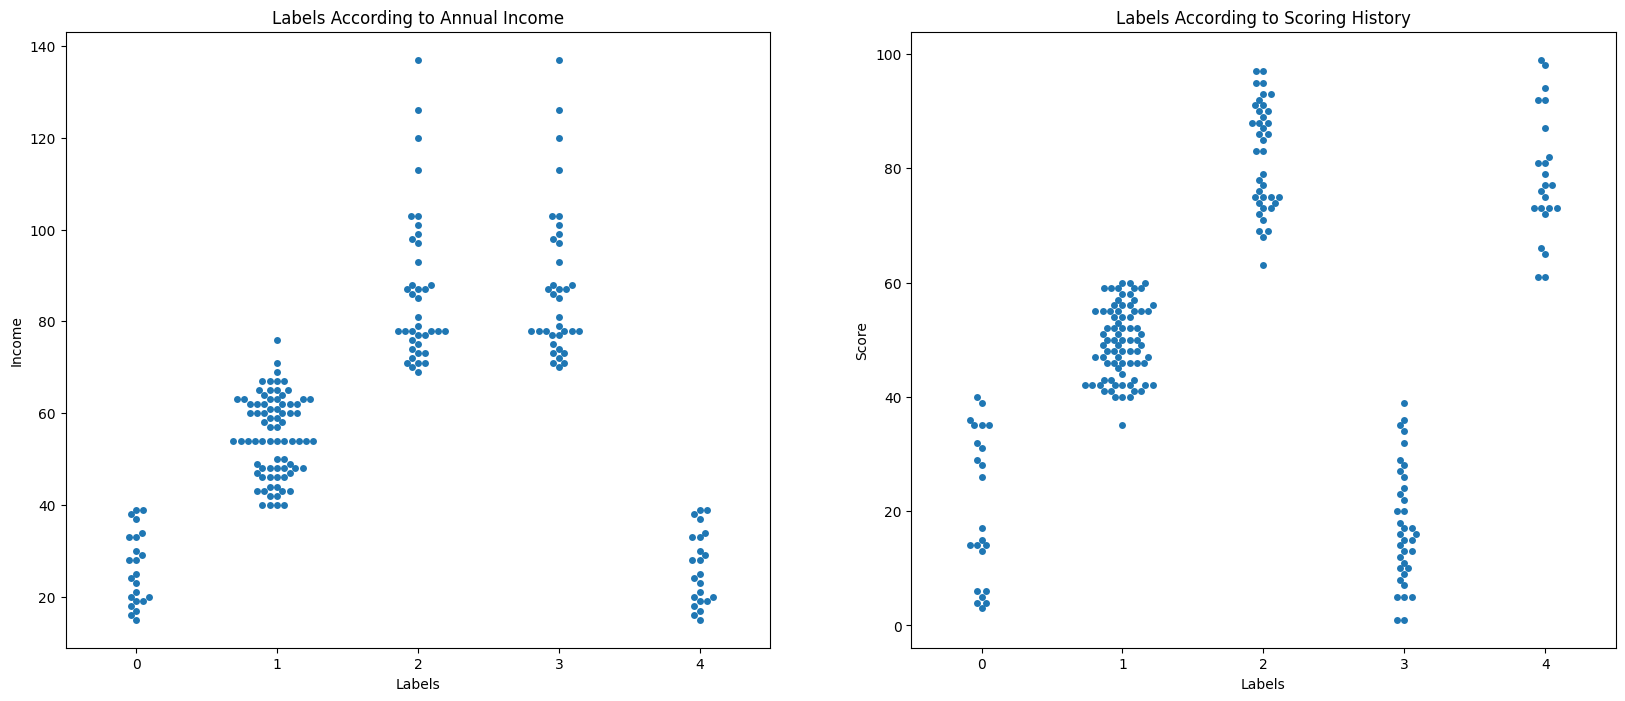

In [51]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

#### <font color="red">A vérifier sur les graphiques ! : </font>

Nous pouvons maintenant analyser en détail nos 5 groupes :
- L'étiquette 0 correspond aux revenus faibles et dépenses faibles
- L'étiquette 1 correspond aux revenus moyens et dépenses moyennes
- L'étiquette 2 correspond aux revenu élevé et dépenses élevés
- L'étiquette 3 correspond aux revenus élevés et dépenses faibles
- L'étiquette 4 correspond aux revenu faibles et dépenses élevés

## Hierarchical Clustering

### Clustering Agglomerative
Le Clustering Agglomerative est l'approche ascendante qui est plus populaire que le clustering divisif. Nous utiliserons également le lien complet comme critère de liaison.           
**Le lien complet** :  entre Centroïdes OU la moyenne de la distance de tous les points 2-à-2.     
Dans scikitlearn, le paramètre de linkage est :
**linkage** : {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’       
- ‘ward’ minimise la variance des clusters étant fusionnés. Minimise bine l'erreur.
- ‘average’ utilise la moyenne des distances de chaque observation des deux ensembles.
- ‘complete’ ou ‘maximum’ utilise les distances maximales entre toutes les observations des deux ensembles.
- ‘single’ utilise le minimum des distances entre toutes les observations des deux ensembles.

Rappel : dans la méthode de clustering "ward", la décision de fusion entre 2 clusters est
basée sur la croissance de l’erreur au carré quand les 2 clusters sont fusionnés. Minimise bien l’erreur (voir cours)

Dans Scikitlearn, la classe de clustering agglomératif nécessitera deux entrées :
- n_clusters : Le nombre de clusters à former ainsi que le nombre de centroïdes à générer. 
- lien : Quel critère de liaison à utiliser. Le critère de lien détermine la distance à utiliser entre les ensembles d'observation. L'algorithme fusionnera les paires de clusters qui minimisent ce critère.

# Exerrice 7:
- Importer AgglomerativeClustering de sklearn.
- Instancier la méthode avec les paramètres n_clusters = 5
- Afficher avec le scatterplot la relation "Income" et "Score" avec les labels associés ('Labels' - hue)

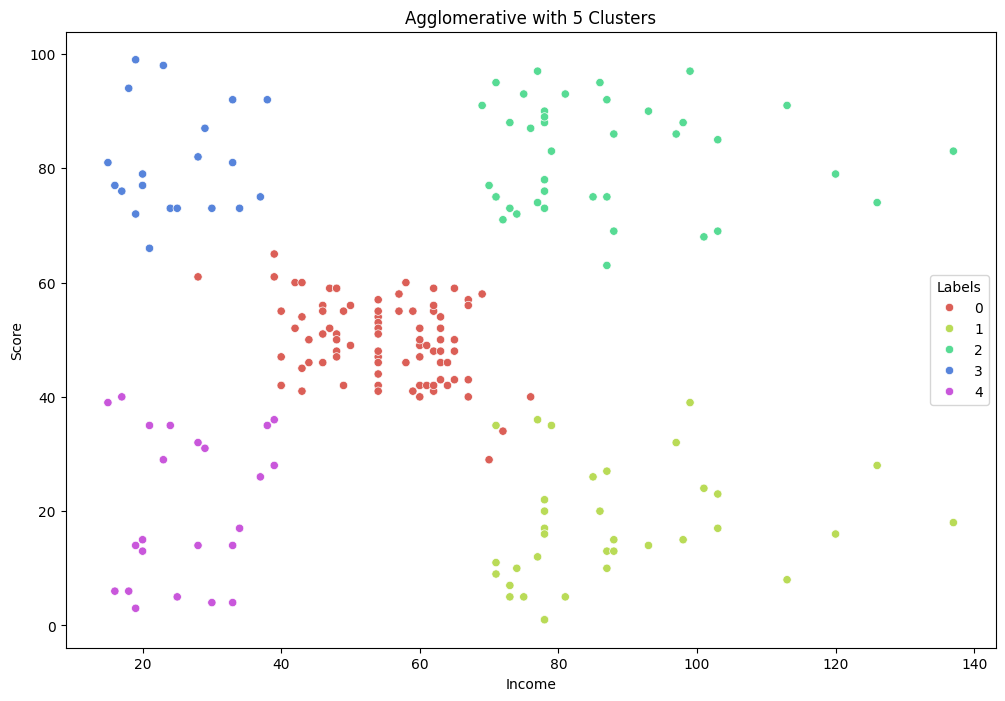

In [53]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5).fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
# ALEX : erreur de version : sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'],  palette=sns.color_palette('hls', 5))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels',  palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

### Dendrogram pour "Agglomerative Hierarchical Clustering"

![](https://miro.medium.com/max/2556/1*r1YriAFjwJokgcdtaodQAQ.png)

Rappel : Une matrice de distance contient la distance entre toute paires de points des données. Nous pouvons utiliser la fonction distance_matrix, qui nécessite deux entrées.      
Les valeurs de distance sont symétriques, avec une diagonale de 0. C'est une façon de s'assurer que la matrice est correcte.

# Exerrice 8:
- Importer hierarchy de scipy 
- Importer distance_matrix de scipy
- Utiliser distance_matrix pour calculer la matrice des distances en les individus de X
- Affihcer la matrice et vérifier que vous avez des 0 sur la diagonale

In [54]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.51104369
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.76066202
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.22111111
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.07889277
   14.35270009]
 [124.51104369 137.76066202 122.22111111 ...  57.07889277   0.
   65.03845017]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.03845017
    0.        ]]


# Exerrice 9:
- Utiliser hierarchy.linkage sur la matrice des distances calculées précédemment
- Stocker dans Z

In [55]:
Z = hierarchy.linkage(dist)

array([[129.        , 131.        ,   5.54596168,   2.        ],
       [ 65.        ,  68.        ,   8.21327711,   2.        ],
       [  3.        ,   5.        ,  13.36756931,   2.        ],
       [ 48.        ,  49.        ,  13.57663151,   2.        ],
       [156.        , 158.        ,  13.8215644 ,   2.        ],
       [147.        , 159.        ,  13.85087871,   2.        ],
       [106.        , 109.        ,  14.65595669,   2.        ],
       [ 92.        ,  96.        ,  17.23213934,   2.        ],
       [100.        , 105.        ,  17.63843234,   2.        ],
       [110.        , 206.        ,  17.83802771,   3.        ],
       [114.        , 115.        ,  18.03956968,   2.        ],
       [113.        , 210.        ,  20.13617127,   3.        ],
       [ 83.        ,  85.        ,  20.27148841,   2.        ],
       [137.        , 139.        ,  20.67587084,   2.        ],
       [101.        , 207.        ,  20.92934378,   3.        ],
       [133.        , 213

Un clustering hiérarchique est généralement visualisé sous la forme d'un dendrogramme, comme le montre la cellule suivante. 

Chaque fusion est représentée par une ligne horizontale. La coordonnée y de la ligne horizontale est la similitude des deux clusters qui ont été fusionnés. 

En remontant de la couche inférieure vers le nœud supérieur, un dendrogramme nous permet de reconstruire l'histoire des fusions qui ont abouti à la mise en cluster représentée. 

# Exerrice 10:
- Afficherle dendogram de Z

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [162.5, 162.5, 190.0, 190.0],
  [145.0, 145.0, 176.25, 176.25],
  [135.0, 135.0, 160.625, 160.625],
  [112.5, 112.5, 147.8125, 147.8125],
  [95.0, 95.0, 130.15625, 130.15625],
  [85.0, 85.0, 112.578125, 112.578125],
  [215.0, 215.0, 225.0, 225.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.5],
  [291.25, 291.25, 333.75, 333.75],
  [415.0, 415.0, 425.0, 425.0],
  [405.0, 405.0, 420.0, 420.0],
  [395.0, 395.0, 412.5, 412.5],
  [385.0, 385.0,

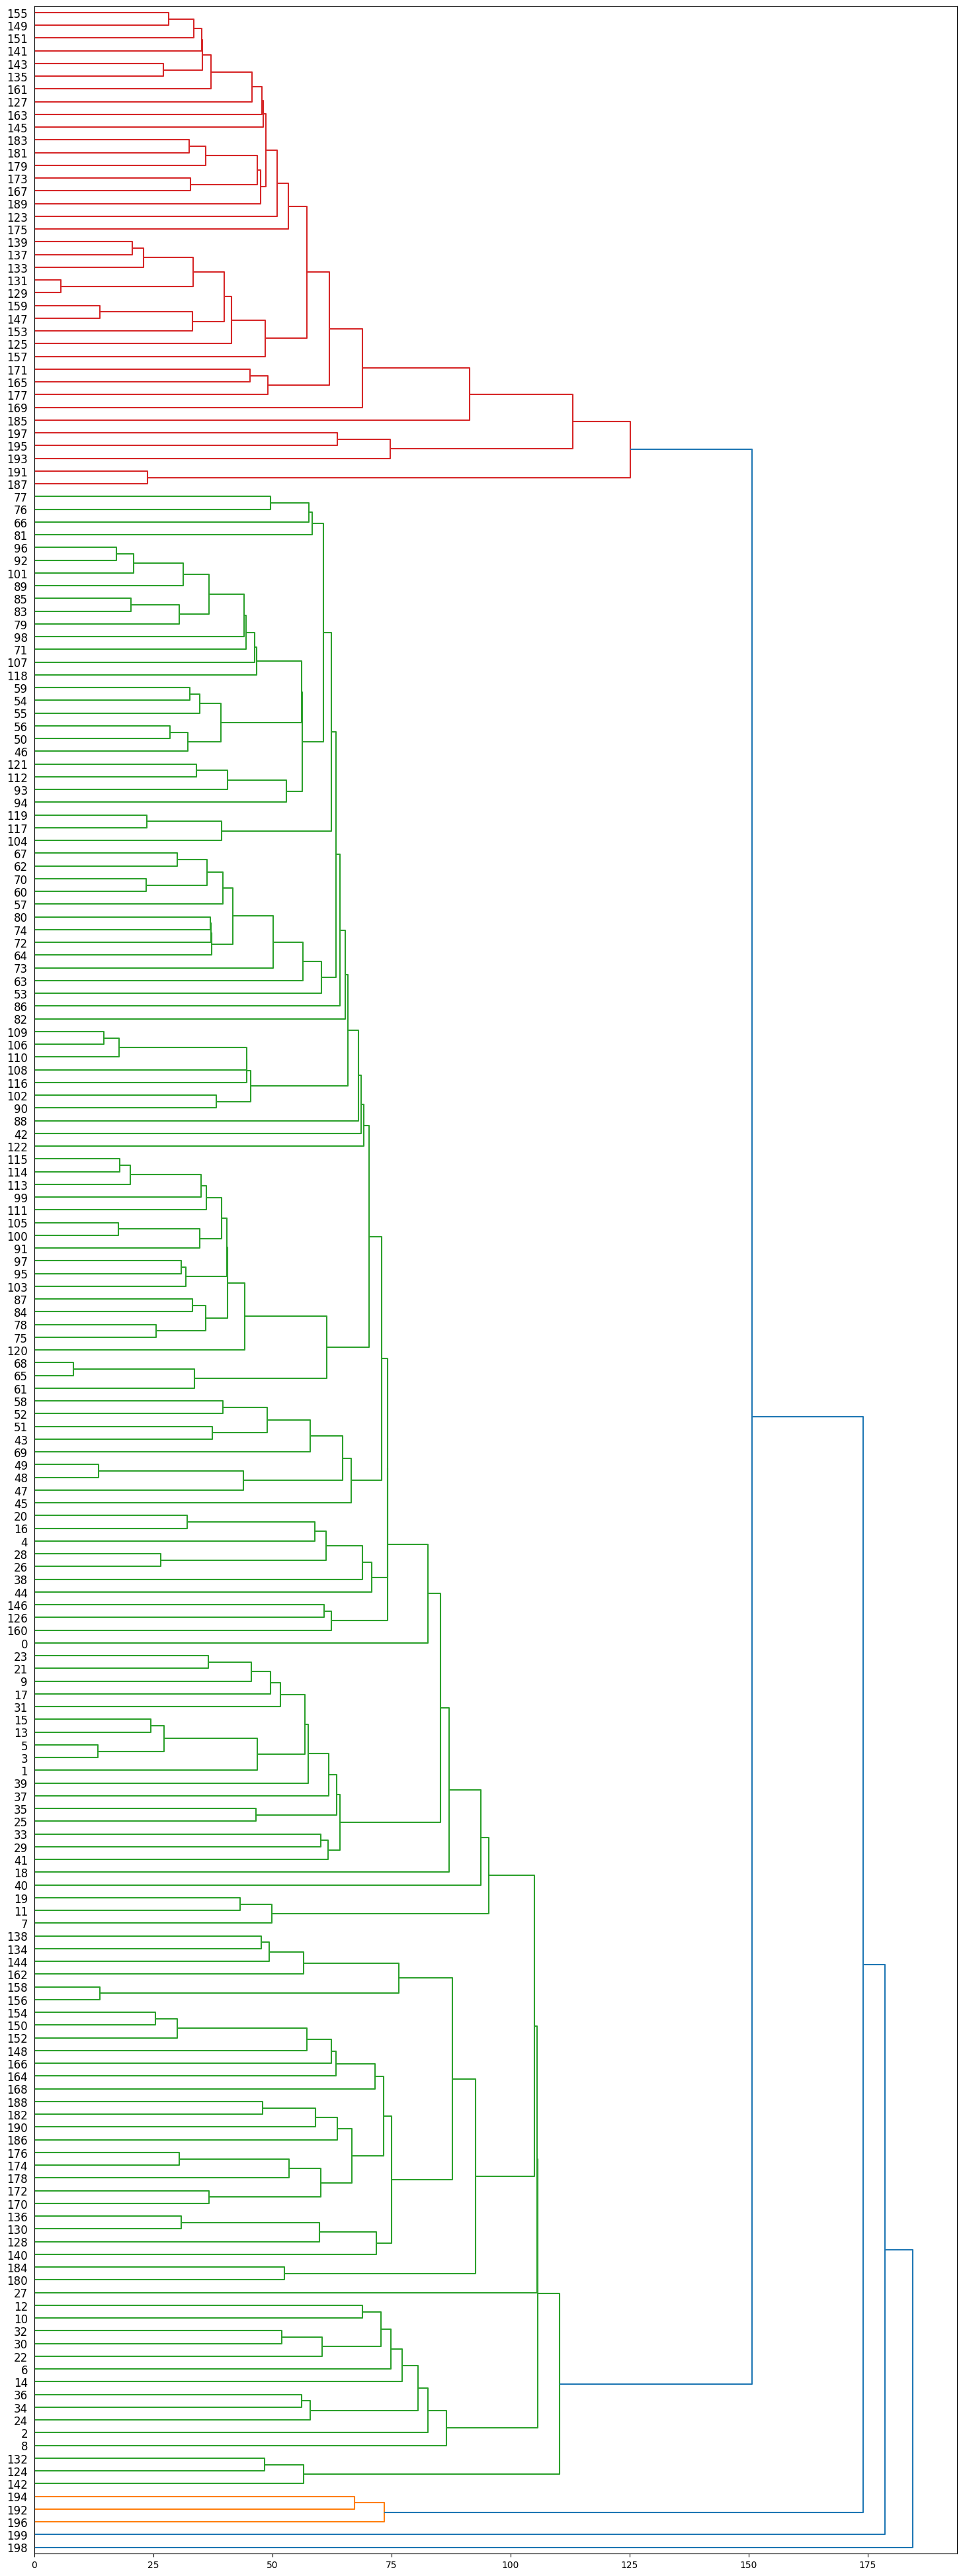

In [56]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

### Custering DBSCAN : Density Based Clustering

![](https://miro.medium.com/max/1128/1*ejlV2WryiH4zGFP_KohEeA.png)



La plupart des techniques non supervisées de clustering telles que les k-means ou le clustering hiérarchique peuvent être utilisées pour segmenter des données. 

Cependant, lorsque les données donnent des clusters de forme arbitraires, ou des clusters à l'intérieur d'un cluster, ces techniques  peuvent ne pas donner de bons résultats. En d'autres termes, les éléments d'un même groupe peuvent ne pas être suffisamment similaires ou les performances peuvent être médiocres.      

Le clustering basé sur la densité localise les régions de haute densité qui sont séparées les unes des autres par des régions de faible densité. La densité  est ici définie comme le nombre de points dans un rayon donné. cf.  cours, méthode DBSCAN.

Dans la suite, on observe les propriétés de DBSCAN dans la manipulation des données pour réaliser le clustering.

De plus Kmeans nous réclame un nombre  de clusters (dont on n'est pas certain de la justesse malgré une aide telle que ELBOW).

Ainsi chaque donnée sera assignée à un cluster, même les outliers. DBSCAN prend en compte ce type de donnée et les isole
dans un autre cluster.

### Modélisation
DBSCAN ("Density-Based Spatial Clustering of Applications with Noise")  est l'un des algorithmes de clustering
 qui fonctionne sur la base de la densité. L'idée générale est que si un point particulier appartient à une cluster, il doit être proche de nombreux autres points de ce cluster.

La méthode fonctionne sur la base de deux paramètres : "Epsilon" et "minimum Samples" 
- Epsilon : Ddétermine un rayon précis qui, s'il comprend un nombre suffisant de points, est appelé zone dense, 
- minimum Samples : Détermine le nombre minimum de données que nous voulons dans une zone (représenté par un cercle, cf. Epsilon)  pour définir un cluster.

# Exerrice 11:
- Importer DBSCAN
- Utiliser les paramètres eps = 11 et min_samples = 6 puis lancer l'apprentissage ("fitter") l'algorithme
- Affihcer le scatterplot pour le croisement "Income", "Score" avec les labels des clusters
- Analyse les résultats du DBSCAN
- Rappel : DBSCAN n'a pas besoin de préciser le nombre de clusters.

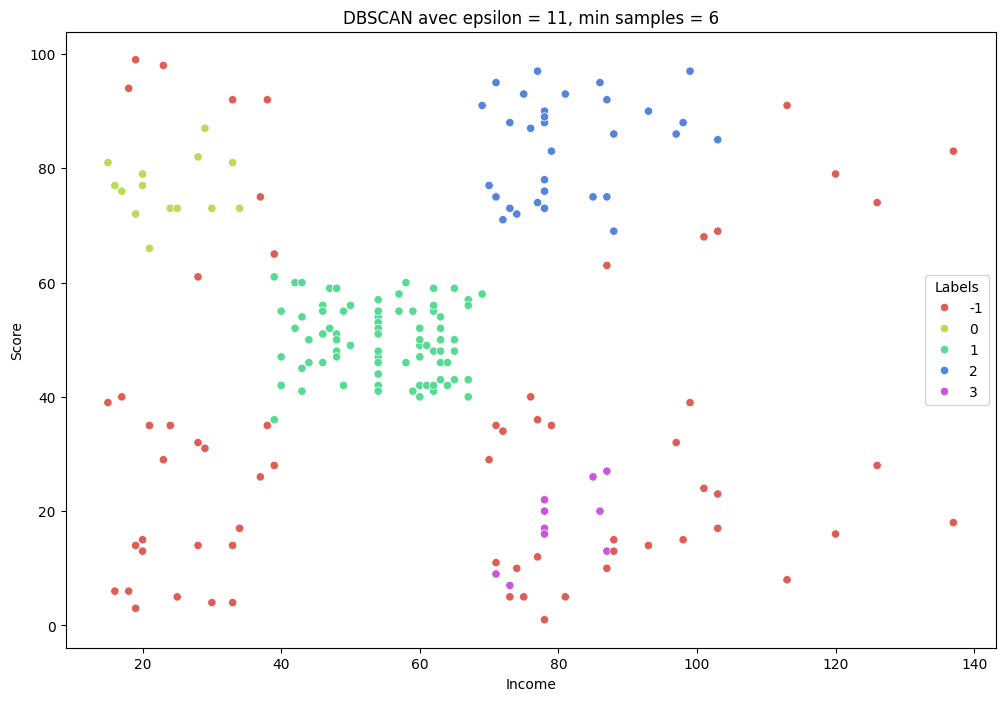

In [61]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
# Alex : erreur de version : 
# sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'],  palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels',  palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN avec epsilon = 11, min samples = 6')
plt.show()


# Exerrice 12:

- Lancer les 3 algorithmes avec les paramètres défini précédemment
- Pour chaque algorithmes afficher le graphique croisant "Income", "Score" avec les labels associés

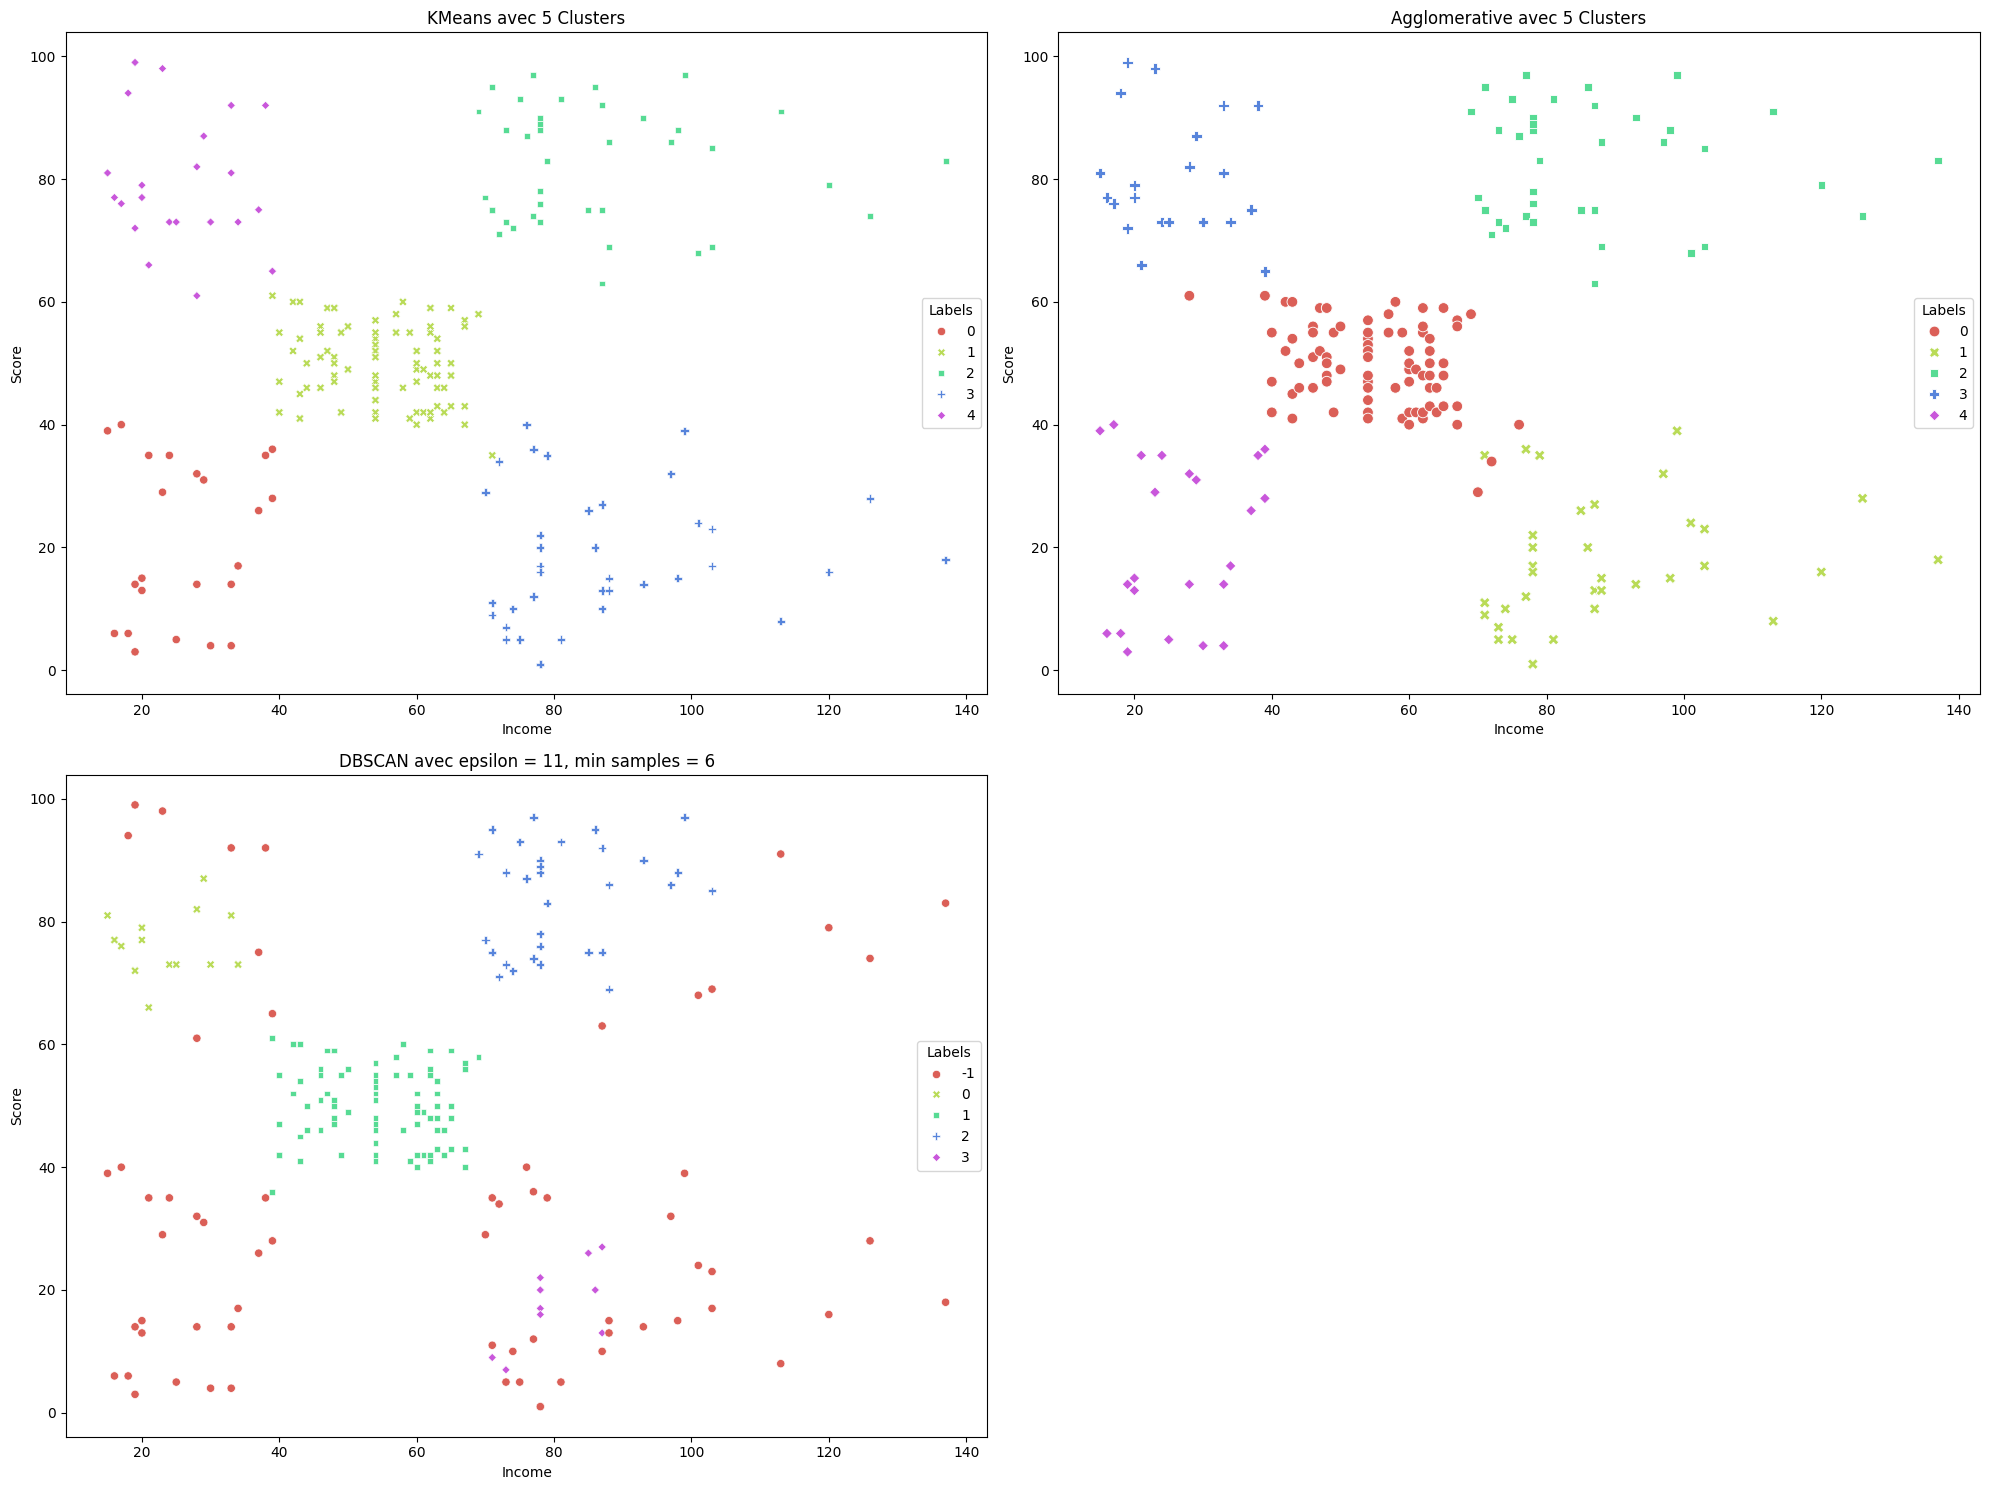

In [63]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
# Alex : erreur de version : sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'],
                # palette=sns.color_palette('hls', 5), s=60, ax=ax)
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels',  style='Labels', palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
ax.set_title('KMeans avec 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5).fit(X)
X['Labels'] = agglom.labels_
# Alex : erreur de version :  sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'],
                # palette=sns.color_palette('hls', 5), s=60, ax=ax)
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels',  style='Labels', palette=sns.color_palette('hls', 5), s=60, ax=ax)

ax.set_title('Agglomerative avec 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
# Alex : erreur de version :  sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                # palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels',  style='Labels', palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)

ax.set_title('DBSCAN avec epsilon = 11, min samples = 6')

plt.tight_layout()
plt.show()

# Evaluation :  

Le coefficient de silhouette est une métrique usuelle pour évaluer la performance du clustering lorsqu'on ne connaît pas les vrais clusters.
Le coefficient de silhouette est calculé pour chaque échantillon : 

$$SC = \frac{b-a} {max(a, b)}$$

- a est la distance moyenne à tous les points du même cluster
- b est la distance moyenne à tous les autres points du cluster le plus proche.

La silhouette prend des valeurs de $[-1,+1]$  (-1 : pire performance, +1 : meilleure performance).      
Le score global est la moyenne de la silhouette.

le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en clustering. 

Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec le points des autres groupes voisins (séparation). 

Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points.


#### Exercice : 

- Importer metrics de sklearn
- Calculer la silhouette pour chaque algorithmes
- Lequel choisirez vous?

In [65]:
from sklearn import metrics

print("Silhouette Coefficient Kmeans: %0.3f" % metrics.silhouette_score(X, km5.labels_, metric='sqeuclidean'))
print("Silhouette Coefficient Agglomerative: %0.3f" % metrics.silhouette_score(X, agglom.labels_, metric='sqeuclidean'))
print("Silhouette Coefficient DBSCAN: %0.3f" % metrics.silhouette_score(X, db.labels_, metric='sqeuclidean'))

Silhouette Coefficient Kmeans: 0.631
Silhouette Coefficient Agglomerative: 0.625
Silhouette Coefficient DBSCAN: 0.214


#### Autre mesures de la qualité des résultats de clustering

In [105]:
from collections import defaultdict
from time import time

from sklearn import metrics

evaluations = []
evaluations_std = []

def my_evaluate1(methode, X, labels, name=None, n_runs=5):

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        t0 = time()
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, methode.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, methode.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, methode.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, methode.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, methode.labels_, sample_size=2000) 
        )
    train_times = np.asarray(train_times)

    #Alex : non utile (on a déjà fitté) : print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


#### Une seconde version (plus complète)

In [106]:
# Seconde version (ajout de Rand-Index = rand_score), et renvoie les evaluations
from collections import defaultdict
from time import time

from sklearn import metrics

evaluations = []
evaluations_std = []

def my_evaluate2(methode, X, labels, name=None, n_runs=5):

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        t0 = time()
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, methode.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, methode.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, methode.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, methode.labels_)
        )
        scores["Rand-Index"].append(
            metrics.rand_score(labels, methode.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, methode.labels_, sample_size=2000) 
        )
    train_times = np.asarray(train_times)

    #Alex : non utile (on a déjà fitté) : print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        #"train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        #"train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

    return evaluations, evaluations_std

### Utilisation (comparaison)
Pour choisir les meilleurs résultats

**N.B. :**      
- Homogeneity = l'homogénéité, qui quantifie combien de clusters contiennent uniquement des membres d'une seule classe ;

- Completeness = quantifie combien de membres d'une classe donnée sont assignés aux mêmes clusters ;

- V-mesure =  la moyenne harmonique de la complétude et de l'homogénéité ;

- Adjusted Rand-Inde =  un Index de Rand ajusté par le hasard tel que l'attribution de clusters aléatoires ait un ARI de 0,0 en attente. (voir ci-dessous).

**Il y a églement** 
- Rand-Index =   mesure à quelle fréquence des paires de points de données sont regroupées de manière cohérente selon le résultat de l'algorithme de clustering et l'attribution de classe de vérité de terrain ;

In [107]:
print("Pour KMeans km3: ")
my_evaluate1(km3, X, labels = km3.labels_, name=km3.__class__.__name__, n_runs=5)
print()

print("Pour KMeans km5 : ")
my_evaluate1(km5, X, labels = km5.labels_, name=km5.__class__.__name__, n_runs=5)
print()

print("Pour Agglomerative : ")
my_evaluate1(agglom, X, labels = agglom.labels_, name=agglom.__class__.__name__, n_runs=5)
print()

print("Pour DMSCAN : ")
my_evaluate1(db, X, labels = db.labels_, name=db.__class__.__name__, n_runs=5)
print()

Pour KMeans km3: 
Homogeneity: 1.000 ± 0.000
Completeness: 1.000 ± 0.000
V-measure: 1.000 ± 0.000
Adjusted Rand-Index: 1.000 ± 0.000
Silhouette Coefficient: 0.384 ± 0.000

Pour KMeans km5 : 
Homogeneity: 1.000 ± 0.000
Completeness: 1.000 ± 0.000
V-measure: 1.000 ± 0.000
Adjusted Rand-Index: 1.000 ± 0.000
Silhouette Coefficient: 0.445 ± 0.000

Pour Agglomerative : 
Homogeneity: 1.000 ± 0.000
Completeness: 1.000 ± 0.000
V-measure: 1.000 ± 0.000
Adjusted Rand-Index: 1.000 ± 0.000
Silhouette Coefficient: 0.442 ± 0.000

Pour DMSCAN : 
Homogeneity: 1.000 ± 0.000
Completeness: 1.000 ± 0.000
V-measure: 1.000 ± 0.000
Adjusted Rand-Index: 1.000 ± 0.000
Silhouette Coefficient: 0.183 ± 0.000



In [ ]:
# Préparation
evaluations=[]; evaluations_std=[]

#### La première méthode a donné le modèle "km3"

Homogeneity: 1.000 ± 0.000
Completeness: 1.000 ± 0.000
V-measure: 1.000 ± 0.000
Adjusted Rand-Index: 1.000 ± 0.000
Rand-Index: 1.000 ± 0.000
Silhouette Coefficient: 0.384 ± 0.000


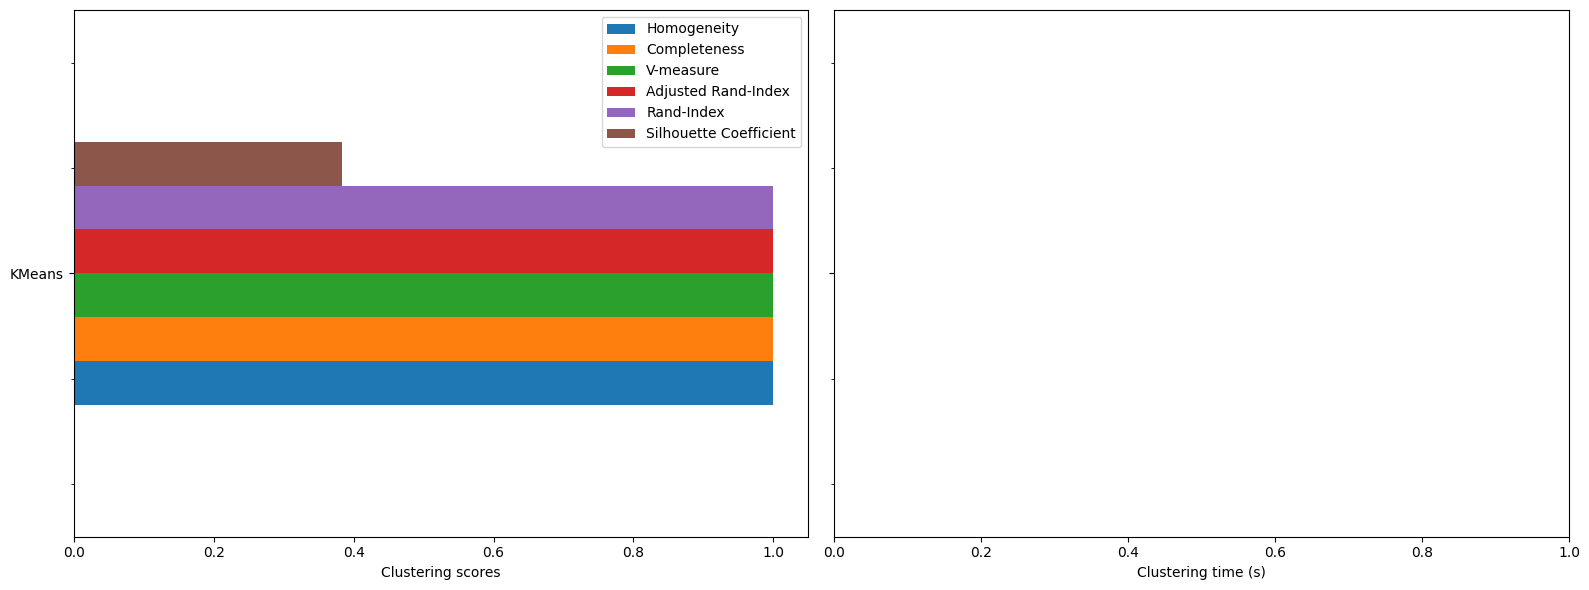

In [113]:
import matplotlib.pyplot as plt
import pandas as pd

evaluations, evaluations_std= my_evaluate2(km3, X, labels = km3.labels_, name=km3.__class__.__name__, n_runs=5)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

#df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")
plt.tight_layout()

### On cmuule avec la 2e méthode : km5

Homogeneity: 1.000 ± 0.000
Completeness: 1.000 ± 0.000
V-measure: 1.000 ± 0.000
Adjusted Rand-Index: 1.000 ± 0.000
Rand-Index: 1.000 ± 0.000
Silhouette Coefficient: 0.445 ± 0.000


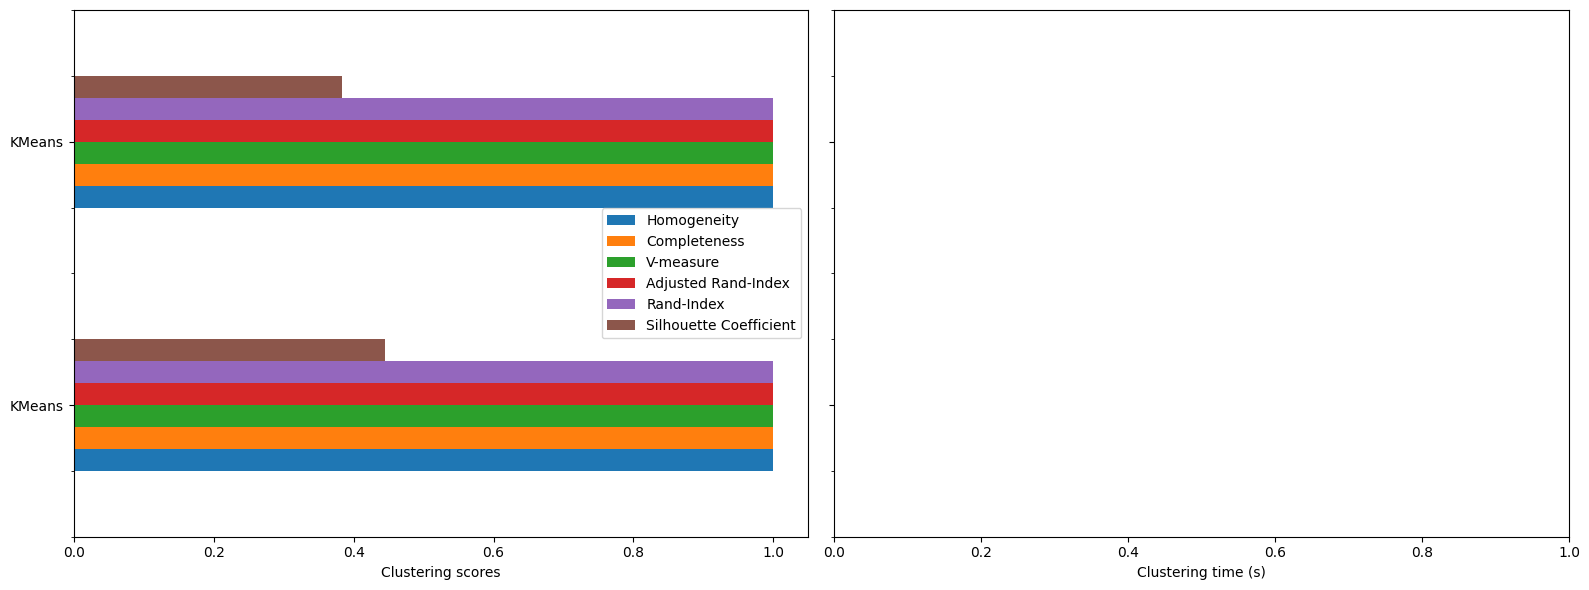

In [114]:
evaluations, evaluations_std= my_evaluate2(km5, X, labels = km5.labels_, name=km5.__class__.__name__, n_runs=5)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

#df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")
plt.tight_layout()

### On cmuule avec le 3e modèle : agglom

Homogeneity: 1.000 ± 0.000
Completeness: 1.000 ± 0.000
V-measure: 1.000 ± 0.000
Adjusted Rand-Index: 1.000 ± 0.000
Rand-Index: 1.000 ± 0.000
Silhouette Coefficient: 0.442 ± 0.000


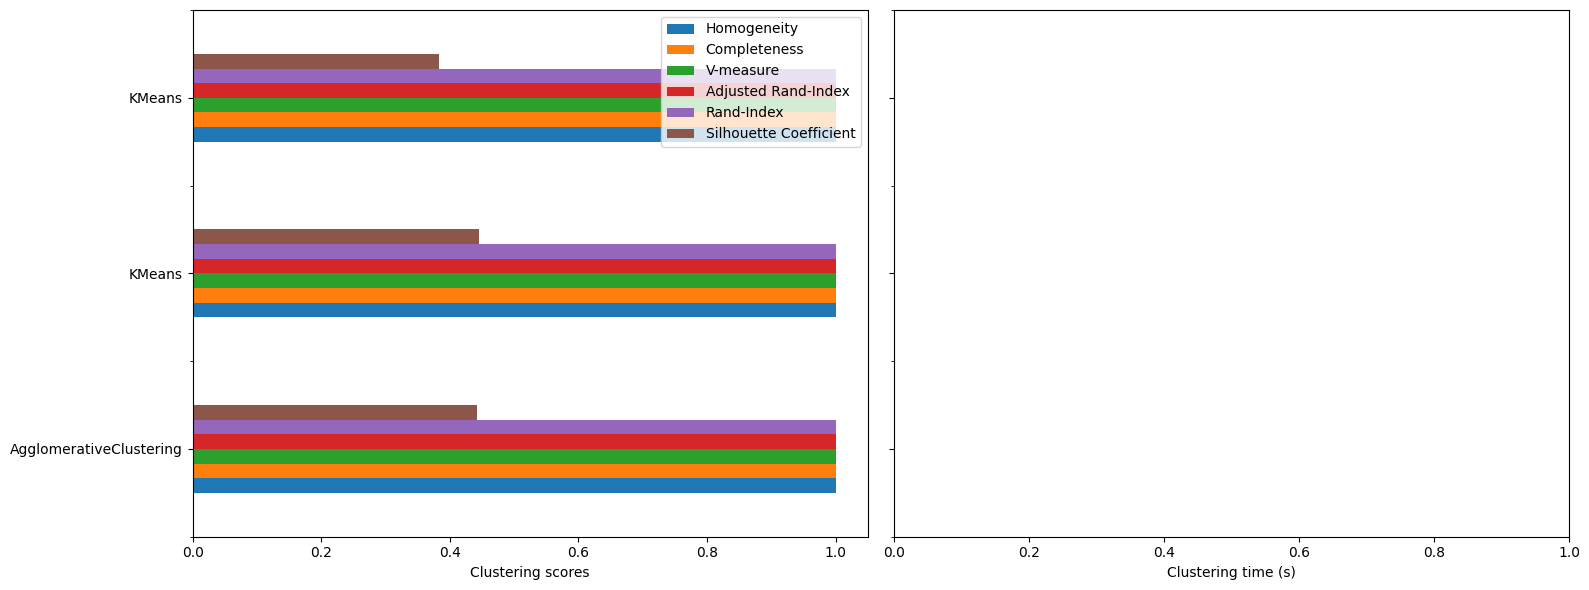

In [115]:
evaluations, evaluations_std= my_evaluate2(agglom, X, labels = agglom.labels_, name=agglom.__class__.__name__, n_runs=5)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

#df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")
plt.tight_layout()

### Et enfin, on cmuule avec le 3e modèle : db

Homogeneity: 1.000 ± 0.000
Completeness: 1.000 ± 0.000
V-measure: 1.000 ± 0.000
Adjusted Rand-Index: 1.000 ± 0.000
Rand-Index: 1.000 ± 0.000
Silhouette Coefficient: 0.183 ± 0.000


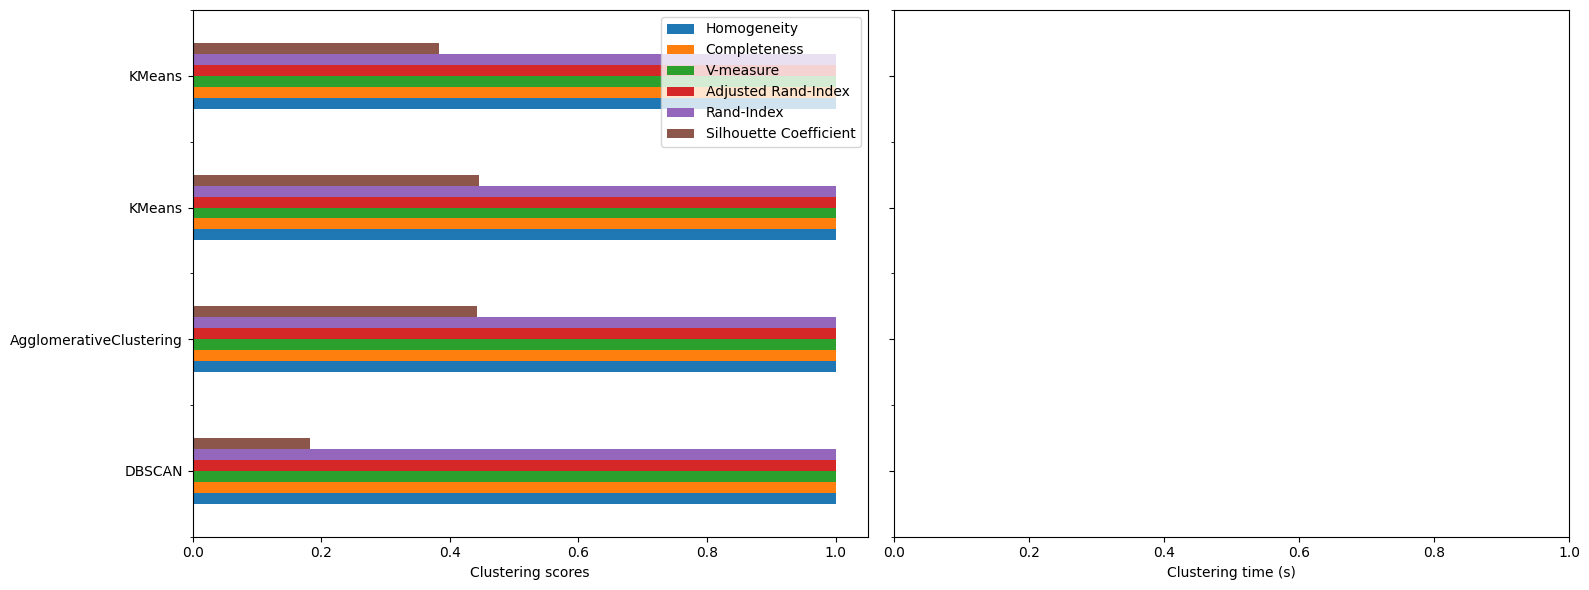

In [116]:
evaluations, evaluations_std= my_evaluate2(db, X, labels = db.labels_, name=db.__class__.__name__, n_runs=5)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

#df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")
plt.tight_layout()

On constate que le coefficient de Silhouette permet de choisir les meilleurs résultats : km5